In [1]:
import pickle as pk
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import os

results_random_wo_test_file = "w_test_features=False_label_balance=False_results.p"
result_random_file = "w_test_features=True_label_balance=False_results.p"
results_wo_test_file = "w_test_features=False_label_balance=True_results.p"
result_file = "w_test_features=True_label_balance=True_results.p"

I_result_file = 'Features_Identity_'+ result_file
I_result_random_file = 'Features_Identity_' + result_random_file
I_results_without_test = 'Features_Identity_'+results_wo_test_file
I_results_random_wo_test_file = 'Features_Identity_'+results_random_wo_test_file

In [2]:
try:
    with open(result_file, 'rb') as f:
        results = pk.load(f, encoding='latin1')['results']
except:
    print("No result")
try:
    with open(results_wo_test_file, 'rb') as f:
        results_wo_test = pk.load(f, encoding='latin1')['results']
except:
    print("No result without test")
try:
    with open(result_random_file, 'rb') as f:
        results_random = pk.load(f, encoding='latin1')['results']
except:
    print("No random result")
try:
    with open(results_random_wo_test_file, 'rb') as f:
        results_wo_test_random = pk.load(f, encoding='latin1')['results']
except:
    print("No random result without test")
    
#Identity    
try:
    with open(I_result_file, 'rb') as f:
        I_results_random = pk.load(f, encoding='latin1')['results']
except:
    print("No identity result")
try:
    with open(I_result_random_file, 'rb') as f:
        I_results = pk.load(f, encoding='latin1')['results']
except:
    print("No identity random result")
try:
    with open(I_results_without_test, 'rb') as f:
        I_results_wo_test = pk.load(f, encoding='latin1')['results']
except:
    print("No identity result without test")

try:
    with open(I_results_random_wo_test_file, 'rb') as f:
        I_results_wo_test_random = pk.load(f, encoding='latin1')['results']
except:
    print("No random result without test")
    

In [17]:
def get_split_data(data):
    x_gcnn = []
    y_gcnn = []
    x_gcnn_sampled = []
    y_gcnn_sampled = []
    for tup in data:
        if tup[0] == 'gcn_subsampled':
            x_gcnn_sampled.append(tup[1])
            y_gcnn_sampled.append(tup[2])
        else:
            x_gcnn.append(tup[1])
            y_gcnn.append(tup[2])
    
    print(x_gcnn)
    print(y_gcnn)
    print(x_gcnn_sampled)
    print(y_gcnn_sampled)
    return x_gcnn, y_gcnn, x_gcnn_sampled, y_gcnn_sampled

def plot_only_one(title, save_file):
    plt.plot(x_gcnn, y_gcnn, 'bo')
    plt.plot(23,0.81,'ko')
    plt.xlabel('known labels of training set %')
    plt.ylabel('test accuracy')
    plt.title(title)
    plt.grid(True)
    plt.savefig(os.path.join('../report',save_file), bbox_inches="tight")
    
def plot(title, save_file):
    plt.plot(x_gcnn, y_gcnn_sampled, 'ro')
    plt.plot(x_gcnn, y_gcnn, 'bo')
    plt.plot(23,0.81,'ko')
    plt.xlabel('known labels of training set %')
    plt.ylabel('test accuracy')
    plt.title(title)
    plt.grid(True)
    blue_patch = mpatches.Patch(color='blue', label='gcnn')
    red_patch = mpatches.Patch(color='red', label='sampled gcnn')
    plt.legend(handles=[red_patch,blue_patch],loc=4)
    plt.savefig(os.path.join('../report',save_file), bbox_inches="tight")
    
def plot_Identity(title, save_file):
    plt.plot(x_gcnn, y_gcnn_sampled, 'ro')
    plt.plot(x_gcnn, y_gcnn, 'bo')
    plt.plot(I_x_gcnn, y_gcnn_sampled_I, 'go')
    plt.plot(I_x_gcnn, y_gcnn_I, 'ko')
    plt.plot(23,0.81,'ko')
    plt.xlabel('known labels of training set %')
    plt.ylabel('test accuracy')
    plt.title(title)
    plt.grid(True)
    blue_patch = mpatches.Patch(color='blue', label='gcnn')
    red_patch = mpatches.Patch(color='red', label='sampled gcnn')
    green_patch = mpatches.Patch(color='green', label='sampled gcnn Idenity')
    black_patch = mpatches.Patch(color='black', label='gcnn Identity')
    plt.legend(handles=[red_patch,blue_patch,green_patch,black_patch],loc=4)
    plt.savefig(os.path.join('../report',save_file), bbox_inches="tight")

[0, 0, 1, 2, 4, 8, 13, 17, 22, 26, 33, 100]
[0.13, 0.50599968, 0.57999945, 0.74099904, 0.75999892, 0.78999901, 0.80199909, 0.83299917, 0.8399992, 0.83699918, 0.83699918, 0.87799931]
[0, 0, 1, 2, 4, 8, 13, 17, 22, 26, 33, 100]
[0.13, 0.43999982, 0.4909997, 0.67999917, 0.72399914, 0.77899903, 0.79999906, 0.83199918, 0.84499919, 0.84199917, 0.83499914, 0.87799931]
[0, 1, 4, 6, 9, 19, 29, 39, 50, 59, 75, 100]
[0.31900001, 0.50899965, 0.58999938, 0.61099935, 0.6559993, 0.70699906, 0.73899907, 0.75699896, 0.78399903, 0.80699909, 0.8059991, 0.82199913]
[0, 1, 4, 6, 9, 19, 29, 39, 50, 59, 75, 100]
[0.147, 0.54999954, 0.6379993, 0.61999935, 0.61199939, 0.75299901, 0.71999907, 0.757999, 0.776999, 0.78699905, 0.80399907, 0.82199913]


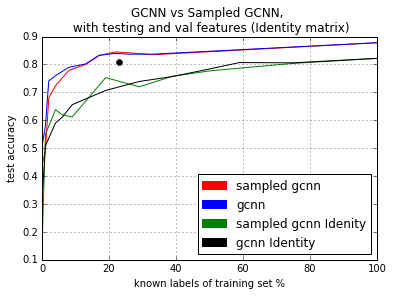

In [11]:
x_gcnn, y_gcnn, x_gcnn_sampled, y_gcnn_sampled = get_split_data(results)
I_x_gcnn, y_gcnn_I, x_gcnn_sampled_I, y_gcnn_sampled_I = get_split_data(I_results)
plot_Identity('GCNN vs Sampled GCNN, \n with testing and val features (Identity matrix)', 'GCNNvs_with_test_Identity.png')
#plot_only_one('GCNN Accurcay vs % Known Labels\nReproducibility Experiment', 'reproducibility_experiment.png')

[0, 0, 1, 2, 4, 8, 13, 17, 22, 26, 33, 100]
[0.13, 0.22899999, 0.37199998, 0.43199986, 0.65799922, 0.71499908, 0.73699903, 0.75599903, 0.75999904, 0.76499903, 0.76299906, 0.77199906]
[0, 0, 1, 2, 4, 8, 13, 17, 22, 26, 33, 100]
[0.13, 0.147, 0.163, 0.21499999, 0.29699999, 0.38499993, 0.41999987, 0.42599988, 0.46399975, 0.47099975, 0.5309996, 0.77199906]
[0, 0, 1, 2, 4, 8, 13, 17, 22, 26, 33, 100]
[0.13, 0.237, 0.33599997, 0.48999971, 0.53599954, 0.60899937, 0.64099932, 0.67899919, 0.69299912, 0.68999916, 0.70799911, 0.81299913]
[0, 0, 1, 2, 4, 8, 13, 17, 22, 26, 33, 100]
[0.13, 0.148, 0.17799999, 0.31800002, 0.35699999, 0.45099977, 0.51999962, 0.56399953, 0.60399938, 0.61499935, 0.63999927, 0.81299913]


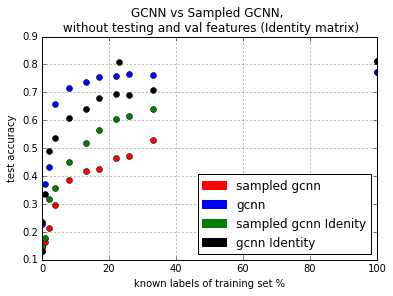

In [18]:
x_gcnn, y_gcnn, x_gcnn_sampled, y_gcnn_sampled = get_split_data(results_wo_test)
I_x_gcnn, y_gcnn_I, x_gcnn_sampled_I, y_gcnn_sampled_I = get_split_data(I_results_wo_test)
plot_Identity('GCNN vs Sampled GCNN, \n without testing and val features (Identity matrix)', 'GCNNvs_without_test_Identity.png')

[0, 0, 1, 2, 4, 8, 13, 17, 22, 26, 33, 100]
[0.13, 0.50599968, 0.57999945, 0.74099904, 0.75999892, 0.78999901, 0.80199909, 0.83299917, 0.8399992, 0.83699918, 0.83699918, 0.87799931]
[0, 0, 1, 2, 4, 8, 13, 17, 22, 26, 33, 100]
[0.13, 0.43999982, 0.4909997, 0.67999917, 0.72399914, 0.77899903, 0.79999906, 0.83199918, 0.84499919, 0.84199917, 0.83499914, 0.87799931]


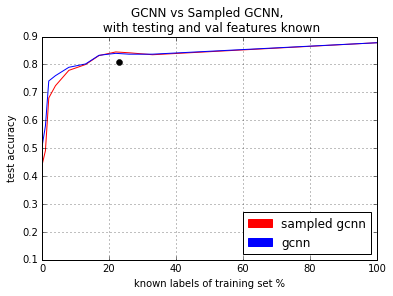

In [13]:
x_gcnn, y_gcnn, x_gcnn_sampled, y_gcnn_sampled = get_split_data(results)
plot('GCNN vs Sampled GCNN, \n with testing and val features known', 'GCNNvs_with_test.png')

[0, 0, 1, 2, 4, 8, 13, 17, 22, 26, 33, 100]
[0.13, 0.22899999, 0.37199998, 0.43199986, 0.65799922, 0.71499908, 0.73699903, 0.75599903, 0.75999904, 0.76499903, 0.76299906, 0.77199906]
[0, 0, 1, 2, 4, 8, 13, 17, 22, 26, 33, 100]
[0.13, 0.147, 0.163, 0.21499999, 0.29699999, 0.38499993, 0.41999987, 0.42599988, 0.46399975, 0.47099975, 0.5309996, 0.77199906]


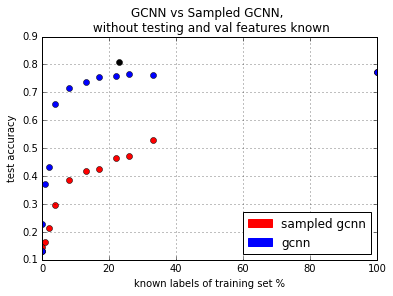

In [19]:
x_gcnn, y_gcnn, x_gcnn_sampled, y_gcnn_sampled = get_split_data(results_wo_test)
plot('GCNN vs Sampled GCNN, \n without testing and val features known', 'GCNNvs_without_test.png')


[0, 1, 4, 6, 9, 19, 29, 39, 50, 59, 75, 100]
[0.13, 0.52499962, 0.58599943, 0.63599932, 0.73499912, 0.69399917, 0.76499897, 0.74199909, 0.74899906, 0.76799905, 0.75599903, 0.77199906]
[0, 1, 4, 6, 9, 19, 29, 39, 50, 59, 75, 100]
[0.131, 0.25400001, 0.29499999, 0.36600003, 0.32499999, 0.35699996, 0.42299986, 0.64799923, 0.63199931, 0.73199904, 0.71899903, 0.77199906]


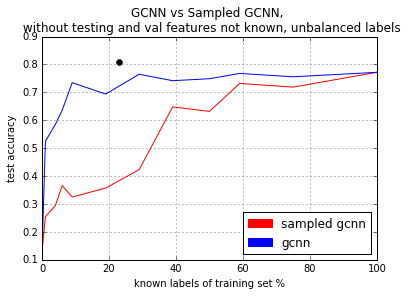

In [15]:
x_gcnn, y_gcnn, x_gcnn_sampled, y_gcnn_sampled = get_split_data(results_wo_test_random)
plot('GCNN vs Sampled GCNN, \n without testing and val features not known, unbalanced labels', 'GCNNvs_without_test_random.png')


[0, 1, 4, 6, 9, 19, 29, 39, 50, 59, 75, 100]
[0.31900001, 0.65599924, 0.72799909, 0.74699903, 0.73299909, 0.81899911, 0.84399921, 0.85799921, 0.85699922, 0.86499923, 0.87199926, 0.87799931]
[0, 1, 4, 6, 9, 19, 29, 39, 50, 59, 75, 100]
[0.149, 0.60299939, 0.7089991, 0.7269991, 0.72399914, 0.82899916, 0.83799917, 0.85899925, 0.85199922, 0.86199921, 0.8739993, 0.87799931]


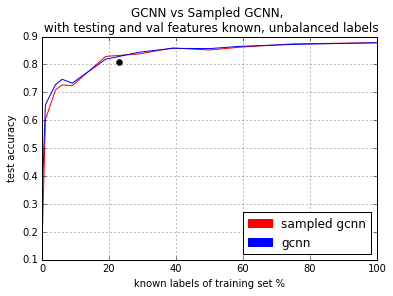

In [16]:
x_gcnn, y_gcnn, x_gcnn_sampled, y_gcnn_sampled = get_split_data(results_random)
plot('GCNN vs Sampled GCNN, \n with testing and val features known, unbalanced labels', 'GCNNvs_with_random.png')
